In [1]:
import pandas as pd

In [3]:
# Import red and white wine datast
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [4]:
red['type'] = 0
white['type'] = 1
print(red.head(2))
print(white.head(2))

wine = pd.concat([red, white])

   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.4              0.70          0.0  ...      9.4        5     0
1            7.8              0.88          0.0  ...      9.8        5     0

[2 rows x 13 columns]
   fixed acidity  volatile acidity  citric acid  ...  alcohol  quality  type
0            7.0              0.27         0.36  ...      8.8        6     1
1            6.3              0.30         0.34  ...      9.5        6     1

[2 rows x 13 columns]


In [5]:
# Type의 평균이 0.75인 것으로 보아 화이트 와인이 레드 와인보다 많다
print(wine.describe())

       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        7.215307          0.339666  ...     5.818378     0.753886
std         1.296434          0.164636  ...     0.873255     0.430779
min         3.800000          0.080000  ...     3.000000     0.000000
25%         6.400000          0.230000  ...     5.000000     1.000000
50%         7.000000          0.290000  ...     6.000000     1.000000
75%         7.700000          0.400000  ...     6.000000     1.000000
max        15.900000          1.580000  ...     9.000000     1.000000

[8 rows x 13 columns]


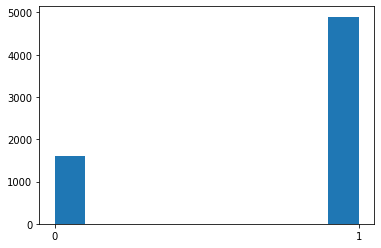

1    4898
0    1599
Name: type, dtype: int64


In [6]:
#레드 와인과 화이트 와인 type 히스토그램 
import matplotlib.pyplot as plt 
plt.hist(wine['type']) 
plt.xticks([0, 1]) # 눈금표시 
plt.show()
print(wine['type'].value_counts())

In [7]:
# info() : 데이터프레임을 구성하는 속성 정보를 알려준다
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


## 데이터의 정규분포 Data Normalization
* 데이터를 0과 1 사이의 범위로 scaling 하는 방법

<img width="423" alt="normalization" src="https://user-images.githubusercontent.com/28593767/112793169-c1c44f80-909f-11eb-9205-3036330e75c8.png">

In [8]:
# Data Normalization
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
# Normalization 된 데이터 출력
print(wine_norm.head()) 
# describe로 출력되는 속성들의 min이 0, max가 1로 변경
print(wine_norm.describe())

   fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
0       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0
1       0.330579          0.533333     0.000000  ...  0.260870  0.333333   0.0
2       0.330579          0.453333     0.024096  ...  0.260870  0.333333   0.0
3       0.611570          0.133333     0.337349  ...  0.260870  0.500000   0.0
4       0.297521          0.413333     0.000000  ...  0.202899  0.333333   0.0

[5 rows x 13 columns]
       fixed acidity  volatile acidity  ...      quality         type
count    6497.000000       6497.000000  ...  6497.000000  6497.000000
mean        0.282257          0.173111  ...     0.469730     0.753886
std         0.107143          0.109758  ...     0.145543     0.430779
min         0.000000          0.000000  ...     0.000000     0.000000
25%         0.214876          0.100000  ...     0.333333     1.000000
50%         0.264463          0.140000  ...     0.500000     1.000000
75%         0

In [9]:
# 데이터 섞은 후 numpy array로 변환 
import numpy as np
wine_shuffle = wine_norm.sample(frac=1)  # frac=1이면 모든 데이터를 뽑아서 섞는 것과 동일
print(wine_shuffle.head()) 
wine_np = wine_shuffle.to_numpy() 
print(type(wine_np)) 
print(wine_np[:5])

      fixed acidity  volatile acidity  citric acid  ...   alcohol   quality  type
1204       0.280992          0.186667     0.277108  ...  0.434783  0.666667   0.0
505        0.330579          0.066667     0.186747  ...  0.130435  0.500000   1.0
3834       0.223140          0.220000     0.132530  ...  0.173913  0.333333   1.0
1363       0.347107          0.500000     0.162651  ...  0.260870  0.166667   0.0
582        0.652893          0.273333     0.295181  ...  0.173913  0.333333   0.0

[5 rows x 13 columns]
<class 'numpy.ndarray'>
[[0.28099174 0.18666667 0.27710843 0.02300613 0.10797342 0.07986111
  0.0875576  0.1586659  0.52713178 0.35393258 0.43478261 0.66666667
  0.        ]
 [0.33057851 0.06666667 0.18674699 0.17791411 0.0730897  0.15625
  0.30875576 0.20994795 0.26356589 0.1741573  0.13043478 0.5
  1.        ]
 [0.2231405  0.22       0.13253012 0.06441718 0.07142857 0.16666667
  0.31336406 0.14439946 0.3255814  0.2247191  0.17391304 0.33333333
  1.        ]
 [0.34710744 0.5     

In [10]:
#train 데이터와 test 데이터로 분리 
import tensorflow as tf
# 80%는 train 데이터, 나머지 20%는 test 데이터를 나누는 Index
train_idx = int(len(wine_np) * 0.8) 
print(train_idx)
# Train 데이터의 경우 마지막 속성을 제외하고 인덱스까지, Train 데이터의 정답은 마지막 속성값
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1] 
# Test 데이터의 경우 마지막 속성을 제외하고 인덱스부터, Test 데이터의 정답은 마지막 속성값
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])
print(test_X[0])
print(test_Y[0])

5197
[0.28099174 0.18666667 0.27710843 0.02300613 0.10797342 0.07986111
 0.0875576  0.1586659  0.52713178 0.35393258 0.43478261 0.66666667]
0.0
[0.25619835 0.20666667 0.24096386 0.06134969 0.02159468 0.01388889
 0.02995392 0.08463466 0.45736434 0.08426966 0.66666667 0.        ]
1.0


In [11]:
# to_categorical은 분류 문제에서 쓰이는 함수로m 정답 행렬을 원-핫 인코딩(One-Hot Encoding) 방식으로 바꾼다
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2) 
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2) 
print(train_Y[0])
print(test_Y[0])

[1. 0.]
[0. 1.]


In [12]:
# 와인 데이터셋 분류 모델 생성 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)), 
    tf.keras.layers.Dense(units=24, activation='relu'), 
    tf.keras.layers.Dense(units=12, activation='relu'), 
    tf.keras.layers.Dense(units=2, activation='softmax')  # 분류 모델이기에 활성화 함수로 softmax 사용
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), 
              loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


## Softmax 
<img width="253" alt="soft" src="https://user-images.githubusercontent.com/28593767/112796488-01da0100-90a5-11eb-98a8-fe811f3d4c1d.png">

> 예시: [2, 1, 0] 이라는 값을 소프트맥스로 변환하면 다음과 같다.
>
> <img width="549" alt="soft_ex" src="https://user-images.githubusercontent.com/28593767/112796493-02729780-90a5-11eb-82b6-1bb0f2e9f1d9.png">


## 엔트로피 Entropy
* 엔트로피는 불확실한 정보를 숫자로 표현하는 것으로 간단히 말해 확률의 역수에 로그를 취한 값이다.
* 확률에 역수를 취하는 이유는 확률이 높을수록 정보량(놀라움)이 적다고 판단하기 때문이다. 
* 엔트로피의 기댓값은 각 엔트로피에 확률을 곱해준 값이다. 
    + 통계에서 기댓값의 정의는 각 사건이 벌어졌을 때의 이득과 그 사건이 벌어질 확률을 곱한 값이다.

In [15]:
# 와인 데이터셋 분류 모델 학습
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Epoch 1/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9920 - val_loss: 0.0260 - val_accuracy: 0.9931
Epoch 2/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9931 - val_loss: 0.0410 - val_accuracy: 0.9931
Epoch 3/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9915 - val_loss: 0.0372 - val_accuracy: 0.9915
Epoch 4/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9920 - val_loss: 0.0292 - val_accuracy: 0.9946
Epoch 5/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9913 - val_loss: 0.0246 - val_accuracy: 0.9908
Epoch 6/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0330 - accuracy: 0.9926 - val_loss: 0.0319 - val_accuracy: 0.9938
Epoch 7/25
122/122 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9923 - val_loss: 0.0241 - val_accuracy: 0.9931
Epoch 

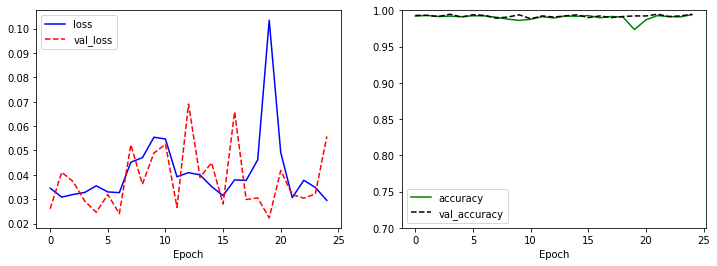

In [16]:
#분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 4)) #시각화 크기 지정

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss') 
plt.plot(history.history['val_loss'], 'r--', label='val_loss') 
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy') 
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy') 
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()